In [14]:
import galsim
import matplotlib.pyplot as plt

In [15]:
data_dir='/Users/remy/Desktop/LSST_Project/GalSim/examples/data'

pix_scale = 0.03 #Pixel size in arcsec
psf_scale = 0.1#Size of the psf in arcsec

s0, s1 = 100, 100 #Image shape
npsf0, npsf1 = 50,50 #Shape of the psf

k = 10

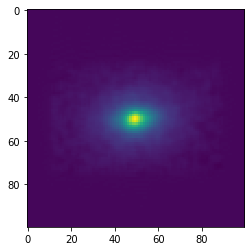

In [16]:
# Define an image frame:

image = galsim.Image(s0, s1, scale=pix_scale) #Empty galsim Image frame

#Load catalog of 100 galaxies
cat = galsim.COSMOSCatalog(dir=data_dir, file_name = 'real_galaxy_catalog_23.5_example.fits')
gal = cat.makeGalaxy(k, gal_type = 'real', noise_pad_size=0)#Draw an image of galaxy
#PSF
psf0 = gal.original_psf.dilate(psf_scale/0.074).withFlux(1.) #Une psf originalement nommée psf

psf = psf0.drawImage(nx=npsf0,ny=npsf1, use_true_center = False, scale = pix_scale).array #The actual image of the psf

galsim.Convolve(gal, psf0).drawImage(image, use_true_center = True, scale = pix_scale, method='fft')

plt.imshow(image.array)
plt.show()